# WHO DATA ANALYSIS

# Problem Definition

# EDA Goals

# Descriptive Analysis

### Import Library

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats 
from matplotlib import pyplot as plt

### Import Data

In [7]:
df = pd.read_csv('seluler.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Data Description

In [8]:
data_desc = []
for i in df.columns:
    data_desc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(data_desc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,customerID,object,0,0.0,7043,"[6968-MHOMU, 5597-GLBUC]"
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,73,"[64, 24]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[No, No phone service]"
8,InternetService,object,0,0.0,3,"[DSL, Fiber optic]"
9,OnlineSecurity,object,0,0.0,3,"[No, Yes]"


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# Data Analysis

### Monthly Spend Based on Gender

In [22]:
mon_gender = [
    ['Female', df[df.gender == 'Female'].MonthlyCharges.mean(), df[df.gender == 'Female'].MonthlyCharges.sum(), df[df.gender == 'Female'].tenure.mean()],
    ['Male', df[df.gender == 'Male'].MonthlyCharges.mean(), df[df.gender == 'Male'].MonthlyCharges.sum(), df[df.gender == 'Male'].tenure.mean()]
]
pd.DataFrame(mon_gender, columns = ['Gender','Monthly Spend Avg', 'Monthly Spend Sum', 'Tenure']).T

,0,1
Gender,Female,Male
Monthly Spend Avg,65.2042,64.3275
Monthly Spend Sum,227432,228684
Tenure,32.2446,32.4954


### Monthly Charges Correlation to Tenure

In [30]:
scipy.stats.pearsonr(df.MonthlyCharges, df.tenure)

(0.24789985628615002, 4.0940449915016345e-99)

Correlation by Pearson method shows that Monthly Charges has correlation with Tenure.

<Figure size 720x720 with 0 Axes>

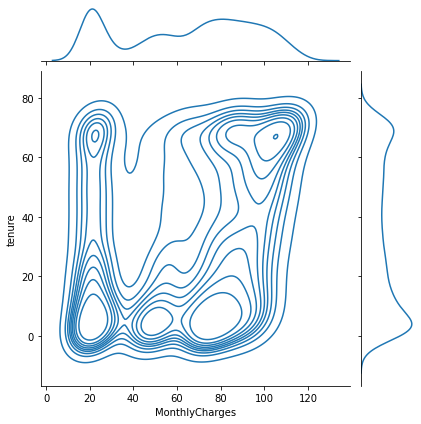

In [36]:
plt.figure(figsize = (10,10))
sns.jointplot(x = df.MonthlyCharges, y = df.tenure, kind = 'kde', palette = 'Blues')
plt.show()

### Churn Based on Contract

In [42]:
pd.crosstab(index=df['Churn'], columns=df['Contract'])

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


### Churn Based on Service

In [44]:
pd.crosstab(index=df['Churn'], columns=[df['PhoneService'],df['InternetService']])

PhoneService      No   Yes                  
InternetService  DSL   DSL Fiber optic    No
Churn                                       
No               512  1450        1799  1413
Yes              170   289        1297   113

### Churn Based on Online Service

In [46]:
pd.crosstab(index=df['Churn'], columns=[df['StreamingTV'],df['StreamingMovies']])

StreamingTV        No      No internet service  Yes      
StreamingMovies    No  Yes No internet service   No   Yes
Churn                                                    
No               1323  545                1413  524  1369
Yes               695  247                 113  243   571

## Conclusion and Recommendation